## Прогнозы и предсказания

**Описание проекта**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.  

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.  

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.  
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

**Описание метрик**  

**Gender** — пол;  
**Near_Location** — проживание или работа в районе, где находится фитнес-центр;  
**Partner** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
**Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
**Phone** — наличие контактного телефона;  
**Age** — возраст;  
**Lifetime** — время с момента первого обращения в фитнес-центр (в месяцах).  

**Contract_period** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
**Month_to_end_contract** — срок до окончания текущего действующего абонемента (в месяцах);  
**Group_visits** — факт посещения групповых занятий;  
**Avg_class_frequency_total** — средняя частота посещений в неделю за все время с начала действия абонемента;  
**Avg_class_frequency_current_month** — средняя частота посещений в неделю за предыдущий месяц;  
**Avg_additional_charges_total** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

### 1. Загрузим данные

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as mth
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st
import scipy.stats as stats
from plotly import graph_objects as go
from io import BytesIO
import requests
import re
import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [32]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [33]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


### 2. Проведем исследовательский анализ данных (EDA)

#### 2.1 Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения 

In [34]:
df.info()
print()
print('Количество дубликатов:', df.duplicated().sum())
print()
print()
print('Количество пропусков:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB

Количество дубликатов: 0


Количе

In [35]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Вывод:** пропуски и дубликаты отсутствуют, все типы данных корректные

Изменим регистр названия столбцов

In [36]:
df.columns = df.columns.str.lower()
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


#### 2.2  Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [37]:
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Те кто ушли:

In [38]:
df[df['churn']==1].mean()

gender                                 0.510839
near_location                          0.768143
partner                                0.355325
promo_friends                          0.183789
phone                                  0.902922
contract_period                        1.728558
group_visits                           0.268615
age                                   26.989632
avg_additional_charges_total         115.082899
month_to_end_contract                  1.662582
lifetime                               0.990575
avg_class_frequency_total              1.474995
avg_class_frequency_current_month      1.044546
churn                                  1.000000
dtype: float64

Те кто остались:

In [39]:
df[df['churn']==0].mean()

gender                                 0.510037
near_location                          0.873086
partner                                0.534195
promo_friends                          0.353522
phone                                  0.903709
contract_period                        5.747193
group_visits                           0.464103
age                                   29.976523
avg_additional_charges_total         158.445715
month_to_end_contract                  5.283089
lifetime                               4.711807
avg_class_frequency_total              2.024876
avg_class_frequency_current_month      2.027882
churn                                  0.000000
dtype: float64

Посмотрим на разницу по средним в метриках:

In [40]:
df[df['churn']==0].mean() -  df[df['churn']==1].mean()

gender                               -0.000801
near_location                         0.104943
partner                               0.178870
promo_friends                         0.169733
phone                                 0.000787
contract_period                       4.018635
group_visits                          0.195489
age                                   2.986890
avg_additional_charges_total         43.362816
month_to_end_contract                 3.620507
lifetime                              3.721232
avg_class_frequency_total             0.549881
avg_class_frequency_current_month     0.983336
churn                                -1.000000
dtype: float64

**Вывод:** все важные показатели у группы людей, которые остались имеют среднее более высокое, чем у группы людей, которые покинули спорт зал. Это и длительность абонемента, и срок до конца абонемента и суммарная вырочка от доп услуг, а так же частота посещений в неделю, как за общий период, так и за последний месяц.

#### 2.3 Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [1]:
fig, ax = plt.subplots()
for i in df.drop('churn', axis=1):
    plt.title("Распределение признака " + i)
    plt.xlabel(i)
    plt.ylabel("количество и плотность")
    sns.distplot(df[df['churn']==1][i], label='churn', kde=False)
    sns.distplot(df[df['churn']==0][i], label='loyal', kde=False)
    plt.legend()
    plt.show()

NameError: name 'plt' is not defined

**Вывод:** можно отметить, что основная часть ушедших имела низкий **lifetime** и минимальную **длительность контракта (1 мес.)**

#### 2.4  Построим матрицу корреляций и отобразите её

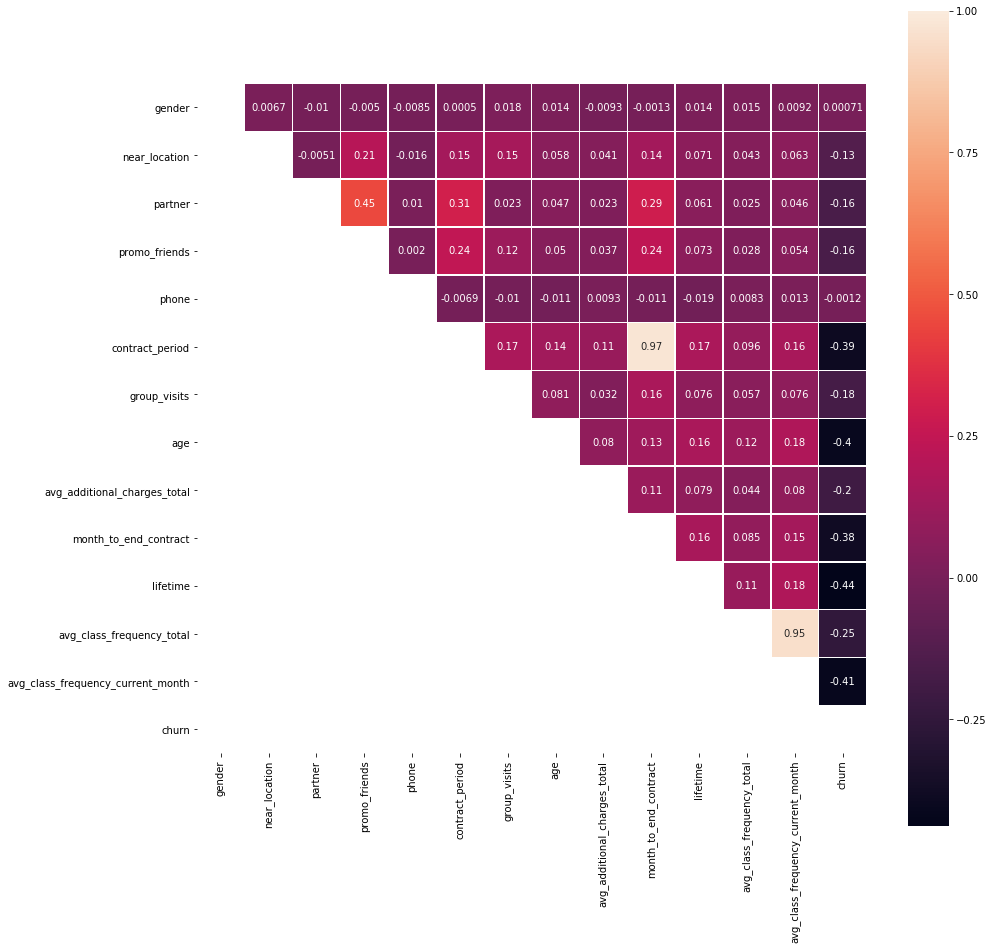

In [42]:
cr = df.corr()
plt.figure(figsize=(15, 15))
matrix = np.tril(cr)
sns.heatmap(cr, annot=True, linewidths=.5, square=True, mask = matrix)
plt.xticks()
plt.show()

**Вывод:** сильная корреляция наблюдается в парах:  
**1. Contract_period - Month_to_end_contract**  
**2. Avg_class_frequency_total - Avg_class_frequency_current_month**

### 3. Построим модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

#### 3.1 Разобъем данные на обучающую и валидационную выборку функцией train_test_split().

In [43]:
X = df.drop('churn', axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 3.2 Обучим модель на train-выборке двумя способами:

**Логистическая регрессия:**

In [44]:
model = LogisticRegression(solver='liblinear', random_state = 0)
lr = model.fit(X_train, y_train)
predictions_lr =  lr.predict(X_test)

**Случайный лес:**

In [45]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf = rf_model.fit(X_train, y_train)
predictions_rf =  rf.predict(X_test)

#### 3.3 Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Выберем из двух моделей лучшую

In [46]:
def metrics(predictions):
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

In [47]:
metrics(predictions_lr)

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


In [48]:
metrics(predictions_rf)

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


**Вывод:** первая модель  **LogisticRegression**  чуть лучше.

### 4. Сделаем кластеризацию клиентов

#### 4.1 Стандартизируем данные

In [49]:
scaler = StandardScaler() 
scaler.fit(X) 
X_sc = scaler.transform(X)

#### 4.2 Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.

In [50]:
linked = linkage(X_sc, method = 'ward')
linked

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

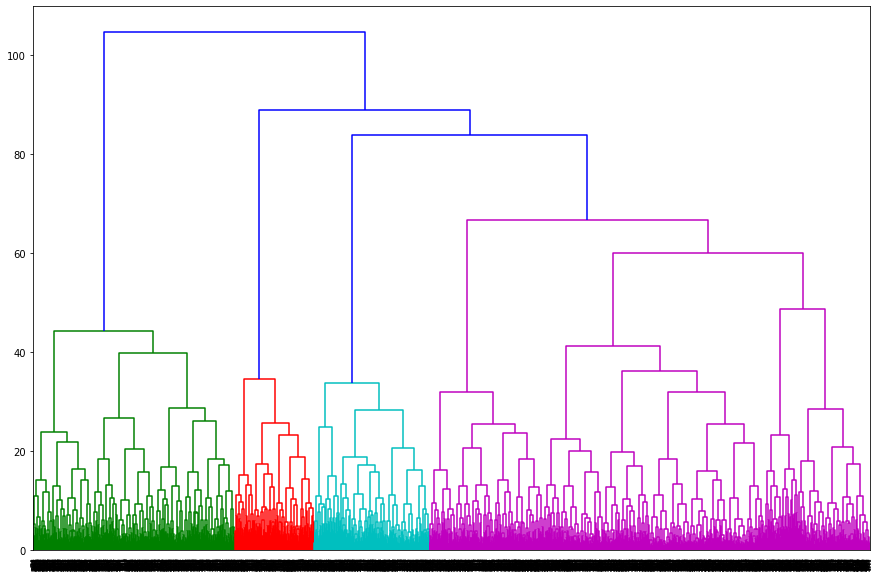

In [51]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation= 'top')
plt.show()

**Вывод:** на основании графика выделим **4** кластера

#### 4.3 Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).

In [52]:
sc = StandardScaler()
x_sc = sc.fit_transform(df)
km = KMeans(n_clusters = 5, random_state = 0)

#### 4.4 Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [53]:
labels = km.fit_predict(x_sc)
df['cluster_km'] = labels

Переименуем названия кластеров:

In [54]:
df.loc[df['cluster_km']==0, 'cluster_km'] = 'cluster 1'
df.loc[df['cluster_km']==1, 'cluster_km'] = 'cluster 2'
df.loc[df['cluster_km']==2, 'cluster_km'] = 'cluster 3'
df.loc[df['cluster_km']==3, 'cluster_km'] = 'cluster 4'
df.loc[df['cluster_km']==4, 'cluster_km'] = 'cluster 5'
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,cluster 5
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,cluster 2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,cluster 4
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,cluster 2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,cluster 5


In [55]:
clasters = df.groupby('cluster_km').mean().T
clasters

cluster_km,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
gender,0.503676,0.492829,0.507917,0.521186,0.518895
near_location,0.000000,0.936115,1.000000,0.996610,0.968023
partner,0.459559,0.764016,0.323995,0.282203,0.744186
promo_friends,0.075368,0.534550,0.213155,0.208475,0.526163
phone,0.917279,0.919166,0.903776,0.904237,0.873547
contract_period,2.069853,10.447197,1.546894,1.882203,8.859012
group_visits,0.211397,0.516297,0.287454,0.452542,0.534884
age,28.522059,29.962190,26.926918,30.237288,29.728198
avg_additional_charges_total,132.741216,161.853561,113.173051,157.988625,162.907495
month_to_end_contract,1.950368,9.477184,1.500609,1.794915,8.155523


**Вывод:**  
Сразу можно обнаружить, что в **1** кластере самая низкая доля посетителей живут или работают рядом с фитнес-центром и самая низкая средняя длительность абонементов, так же этот кластер уступает и по другим показателям остальным кластерам. в **4** кластере отсутствуют номера телефонов

#### 4.5 Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?

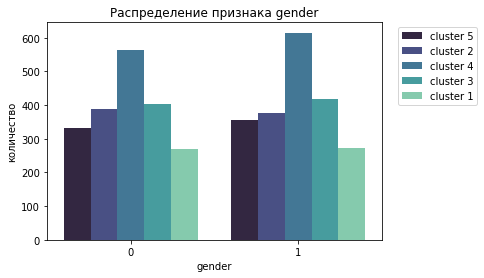

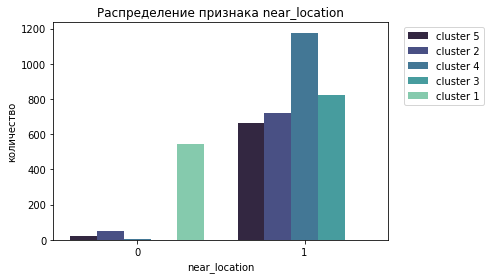

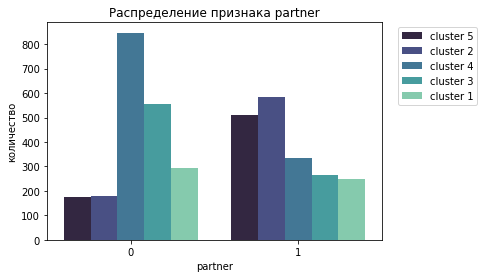

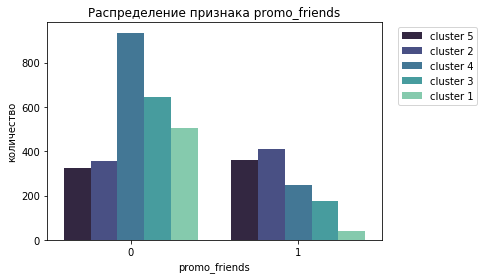

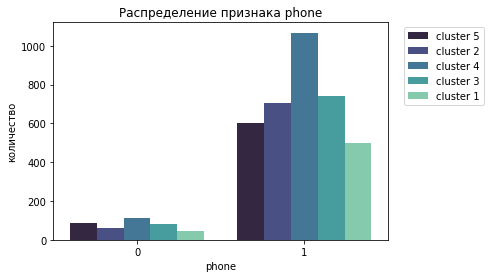

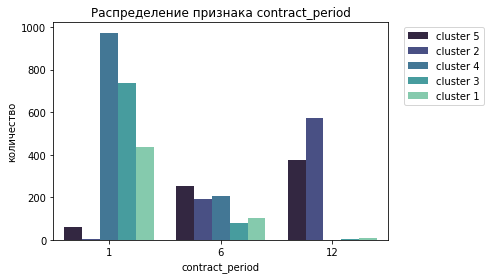

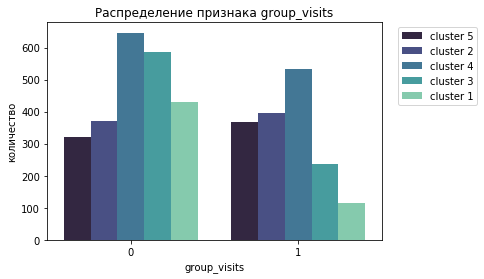

In [56]:
metrics1 = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

fig, ax = plt.subplots()

for column in metrics1:
    
    plt.title("Распределение признака " + column)
    sns.countplot(data=df, x=column, hue='cluster_km', palette="mako")
    plt.xlabel(column)
    plt.ylabel("количество")
    plt.legend(bbox_to_anchor=(1.3, 1))
    plt.show()

**Вывод:** у **4** кластера полностью отсуствуют номера телефонов клиентов, у кластеров **2,3,5** все клиенты оставили номера телефонов. Кластер **2** не имеет клиентов с периодом абонемента в 1 месяц, в кластере **1** в основном длит. абонемента 1 месяц и преобладают посещения групповых занятий.

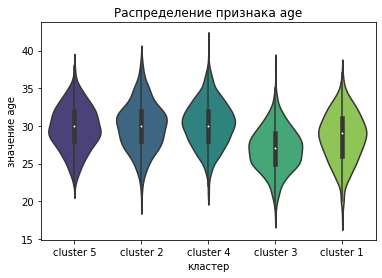

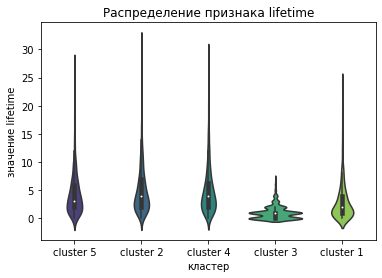

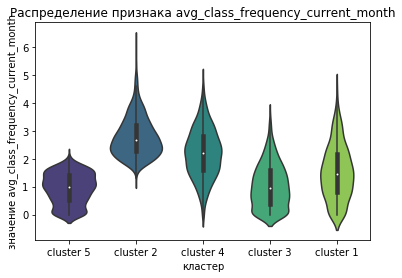

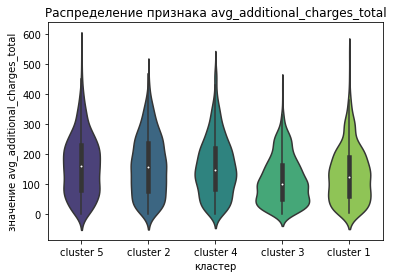

In [57]:
metrics2 = ['age', 'lifetime', 'avg_class_frequency_current_month', 'avg_additional_charges_total']

fig, ax = plt.subplots()
for column in metrics2:
    
    plt.title("Распределение признака " + column)
    sns.violinplot(x='cluster_km', y=column, data=df, palette='viridis')
    plt.xlabel('кластер')
    plt.ylabel('значение ' + column)
    plt.show()

**Вывод:** кластер **1** можно назвать самым молодым(возраст клиентов), так же кластер **1** отлиичается очень низкой продолжительностью посещений, никто из пользователей в нем не ходил более года в зал. У кластера **5** самая высокая средняя частота посещений в неделю.

#### 4.6 Для каждого полученного кластера посчитае долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [58]:
churn = df.groupby('cluster_km')['churn'].mean().reset_index().sort_values(by='churn', ascending=False).reset_index(drop=True)
churn

,cluster_km,churn
0,cluster 3,0.961023
1,cluster 1,0.450368
2,cluster 5,0.024709
3,cluster 2,0.007823
4,cluster 4,0.003390


**Вывод:** самый высокий кластер по оттоку **1**, у него почти **100%**, надежными можно назвать кластеры **2,3,5**

### 5. Выводы и базовые рекомендации по работе с клиентами

* Делать упор на продолжительные абонементы, для мотивации приобретения можно использовать прогрессивную шкалу скидок - дольше абонемент - больше скидка (дешевле 1 мес посещения)
* Самые интересные клиенты - те кто живут или работают рядом (нужна настройка рекламы по геопозиции)
* Продолжать использовать акцию "приведи друга", она является эффективной
* Продолжать использовать партнерские программы, они так же являются эффективными